In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import openturns as ot
import random 
from scipy.stats import norm
import graycode
from tqdm import tqdm

##### Task 1
Derive an explicit formula for calculating the values of a random variable ξ with a distribution function

$$ F(x) = 1 - {2 e^{-x} + e^{-5x} \over 3} $$
$$ \gamma = 1 - F(x)$$
$$ \gamma = {2 e^{-x} + e^{-5x} \over 3}$$
$$ \widetilde \gamma = \gamma + o(e^{-x})= {2 \over 3}e^{-x} + o(e^{-x})$$

$$ \widetilde \gamma = 1 - F(x) + o(e^{-x}) $$
$$ F(x) = 1 - \widetilde \gamma + o(e^{-x}) $$

$$ F(x) = 1 - {2 \over 3} e^{-x} + o(e^{-x}) $$
$$ e^{-x} = {3 \over 2}(1 - F(x) + o(e^{-x}))$$
$$ -x = ln \left({3 \over 2}(1 - F(x) + o(e^{-x})) \right)$$
$$ x = ln \left({2 \over 3(1 - F(x)) + o(e^{-x})} \right)$$
$$ \xi = ln \left({2 \over 3 \gamma + o(e^{-x})} \right)$$

if $ \gamma = F(x) = 1 -{2 e^{-x} + e^{-5x} \over 3} $
$$ \xi = ln \left({2 \over 3(1 - \gamma) + o(e^{-x})} \right)$$


In [3]:
def gamma(x):
    return 1 - (2 * np.exp(-x) + np.exp(-5 * x)) / 3

In [4]:
def gamma_tilde(x):
    return 1 - (2 * np.exp(-x)) / 3

In [5]:
def xi(x, gm):
    return np.log(2 / (3 * (1 - gm(x))))

In [6]:
def get_plot(foo_1, foo_2, param=5):
    print(abs(foo_1(param) - foo_2(param)))
    plt.rcParams['font.size'] = '10'
    fig, ax = plt.subplots()
    ax.plot()
    plt.plot(np.linspace(0, param, 10 ** 5), foo_1(np.linspace(0, param, 10 ** 5)), label=foo_1.__name__)
    plt.plot(np.linspace(0, param, 10 ** 5), foo_2(np.linspace(0, param, 10 ** 5)), label=foo_2.__name__)

    ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
    plt.legend(loc = 'best', fancybox = True, shadow = True)


    fig.set_figwidth(7)
    fig.set_figheight(5)

    plt.title(f'')
    plt.show()

1.5133309920867255e-05


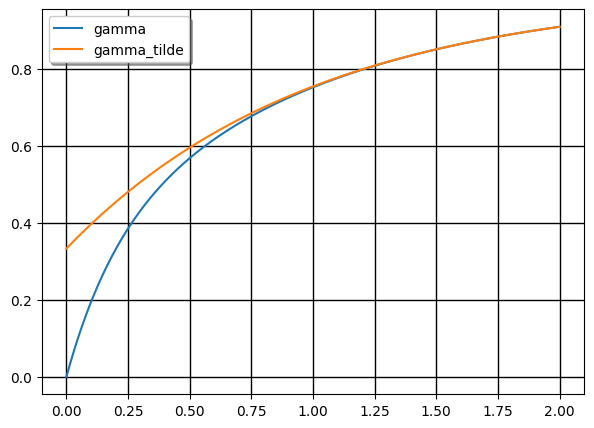

4.629296945779515e-12


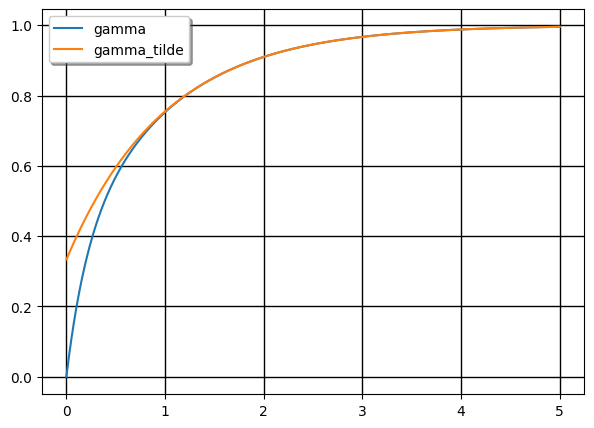

In [7]:
get_plot(gamma, gamma_tilde, 2)
get_plot(gamma, gamma_tilde, 5)


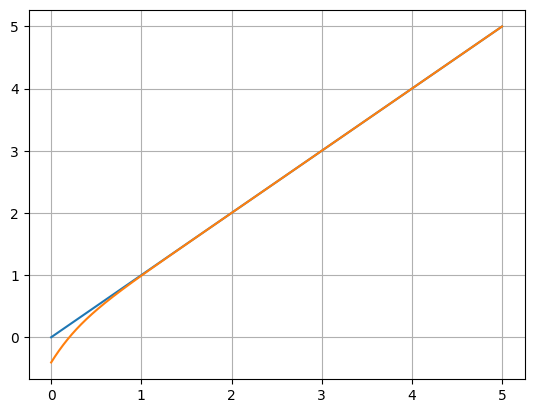

In [8]:
# композиция функций
param = 5
plt.grid(True)
plt.plot(np.linspace(0, param, 10 ** 5), xi(np.linspace(0, param, 10 ** 5), gamma_tilde))
plt.plot(np.linspace(0, param, 10 ** 5), xi(np.linspace(0, param, 10 ** 5), gamma))
plt.show()

##### Task 2

$$ R_{1}^{2} \leq x^{2} + y^{2} \leq R_{2}^{2}$$
$$
\begin{cases}
 & x = r cos(\phi) \\ 
 & y = r sin(\phi) 
\end{cases}
$$
$$ R_{1}^{2} \leq r^{2} \leq R_{2}^{2}$$
$$  c(\phi, r) = {1 \over S_{ring}} = {1 \over \pi (R_{2}^{2} - R_{1}^{2})} $$
$$  C(\phi, r) = F(\phi)F(r) $$
$$
\begin{cases}
 & F_{\theta_{1}}(\phi) = \gamma_{1} = {\phi \over 2\pi}  \\
 & F_{\theta_{2}}(r) = \gamma_{2} =  {r^{2} - R_{1}^{2} \over R_{2}^{2} - R_{1}^{2}} 
\end{cases}
$$

$$
\begin{cases}
 & \theta_{1} = \gamma_{1} 2 \pi \\
 & \theta_{2} = \sqrt{R_{1}^{2} + \gamma_{2} (R_{2}^{2} - R_{1}^{2})}
\end{cases}
$$

$$
\begin{cases}
 & \xi_{1} = \theta_{2} cos(\theta_{1}) = \sqrt{R_{1}^{2} + \gamma_{2} (R_{2}^{2} - R_{1}^{2})} cos(\gamma_{1} 2 \pi) \\

 & \xi_{2} = \theta_{2} sin(\theta_{1}) = \sqrt{R_{1}^{2} + \gamma_{2} (R_{2}^{2} - R_{1}^{2})} sin(\gamma_{1} 2 \pi)
\end{cases}
$$

##### Task 3

$$\int_{0}^{\inf} x^{-{5 \over 2}} f(x) dx$$
$$ f(x) \sim x, x \rightarrow \inf$$
$$ f(x) \sim x^{2}, x \rightarrow 0$$

\begin{cases}
 & D(Z(x)) = E(Z^{2}(x)) - E^{2}(Z(x))     \\
 & E(Z^{2}(x)) = \int_{G} Z^{2}(x) p(x) dx \\
 & E^{2}(Z(x)) = \left(\int_{G} Z(x) p(x) dx \right)^{2} \\
\end{cases}

$ I_{1}: $
$$ p(x) = \lambda x^{- {2 \over 5}}, \lambda = {5 \over 7}$$

$$ I_{1}(x) = \int_{0}^{1} {x^{- {5 \over 2}} f(x) \over p(x)} dx = {7 \over 5} \int_{0}^{1} x^{- {21 \over 10}} f(x) dx = \int_{0}^{1} Z_{1} dx $$

$$ E(Z_{1}^{2}) = \int_{0}^{1} \left(x^{-{21 \over 10}} f(x) {7 \over 5}\right)^{2} p(x) dx = - {7 \over 2}$$
$$ E^{2}(Z_{1}) = \left(\int_{0}^{1} x^{-{21 \over 10}} f(x) {7 \over 5} p(x) dx \right)^{2} = {25 \over 4}$$
$$ D(Z_{1}) = \left({25 \over 4} - {14 \over 4} \right) = {11 \over 4}$$


$ I_{2}:$
$$ p(x) = \lambda x^{-{7 \over 5}}, \lambda = {2 \over 5}$$

$$ I_{2}(x) = \int_{1}^{inf} {x^{- {5 \over 2}} f(x) \over p(x)} dx = {5 \over 2}\int_{1}^{inf} x^{-{11 \over 10}} f(x) dx = \int_{1}^{inf} Z_{2} dx$$
$$ E(Z_{2}^{2}) = \int_{1}^{inf} \left(x^{-{11 \over 10}} f(x) {5 \over 2} \right)^{2} p(x) dx = {25 \over 6} $$
$$ E^{2}(Z_{2}) = \left( \int_{1}^{inf} x^{-{11 \over 10}} f(x) {5 \over 2}  p(x) dx \right)^{2} = {1 \over 2} $$
$$ D(Z_{2}) = {25 \over 6} + {1 \over 2} = {14 \over 3} $$

$ ans: $
$$ D(Z) = D(Z_{1}) + D(Z_{2}) = {11 \over 4} + {14 \over 3} = {89 \over 12}$$

##### Task 5

##### Task 6
Calculate the Monte Carlo payoff of a European call option and compare it with the exact Black-Scholes formula.    The volatility σ is constant



$$ d S_{t} = r S_{t} dt + \sigma S_{t} dW_{t}$$
$$ dW_{t} \sim N\left(0, {T \over N} \right)$$


In [9]:
def BSM_numerical(S, r, sigma, dt):
    return r * S * dt + sigma * S * np.random.normal(0, np.sqrt(dt))

$$ S(T) = S(0) exp\left((r - {\sigma^{2}  \over 2})T + \sigma \sqrt{T} z\right)  $$
$$ z \sim N(0, 1) $$

In [10]:
def BSM(S_0, r, sigma, T):
    return S_0 * np.exp((r - (sigma ** 2) / 2) * T + sigma * np.sqrt(T) * np.random.normal(0, 1))

$$ BS(S(0), \sigma, T, r, K) = S(0) Ф\left({log({S(0) \over K}) + (r + {\sigma^{2} \over 2})T \over \sigma \sqrt{T}} \right) - e^{-rT}KФ\left({log({S(0) \over K}) + (r - {\sigma^{2} \over 2})T \over \sigma \sqrt{T}} \right)  $$

In [11]:
def BS_exact(S_0, sigma, T, r, K):
    d_plus = norm.cdf((np.log(S_0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))) 
    d_minus = norm.cdf((np.log(S_0 / K) + (r - (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T)))
    return S_0 * d_plus - np.exp(-r * T) * K * d_minus

$$ payoff(S(T), K) = (S(T) - K)^{+} $$

In [12]:
def BSM_payoff(S):
    global strike
    if S > strike:
        return S - strike
    return 0

In [13]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, 10 ** 4

In [14]:
def BSM_two_methods(S, r, sigma, T, dt):
    z = np.random.normal(0, np.sqrt(dt))
    return r * S * dt + sigma * S * z, S * np.exp((r - (sigma ** 2) / 2) * T + sigma * np.sqrt(T) * z)

In [15]:
# сначала считаются средние payoff без дисконтирования, затем домножаются на диск. множитель
# т.к. r - const, то можно вынести константу за знак мат. ожидания
ans = np.mean([np.vectorize(BSM_payoff)
               (np.array([S_0 + BSM_two_methods(S_0, r, sigma, T, T)[0], 
                          BSM_two_methods(S_0, r, sigma, T, T)[1]]))  for i in range(N)], axis=0) * np.exp(-r * T)
print('payoff:')
print('numerical solution:', ans[0])
print('analytical solution:', ans[1])
print('exact solution:', BS_exact(S_0, sigma, T, r, strike))

payoff:
numerical solution: 1.9463110102235244
analytical solution: 2.014034622127891
exact solution: 2.0616301851268855


##### Task 7
Calculate the Monte Carlo payoff of an Asian call option. The volatility σ is constant.

In [16]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, 10 ** 4
period_counts = 10

In [17]:
S_numerical = np.zeros((N, period_counts))
S_numerical[:, 0] = S_0
S_analytical = np.zeros((N, period_counts))
S_analytical[:, 0] = S_0

for i in range(N):
    for t in range(1, period_counts):
        temp = BSM_two_methods(S_numerical[i, t - 1], r, sigma, T, T / period_counts)
        S_numerical[i, t] = S_numerical[i, t - 1] + temp[0]
        S_analytical[i, t] = temp[1]

print('numerical:')
print('average price of average prices:', np.mean(np.mean(S_numerical, axis=1), axis=0))
print('payoff:', BSM_payoff(np.mean(np.mean(S_numerical, axis=1), axis=0)) * np.exp(-r * T))
print()

(np.mean(S_numerical[:, 1]) - strike) * np.exp(-r * T)

numerical:
average price of average prices: 20.927247772798037
payoff: 0.8390084806181695



0.18227035851233367

##### Task 8
Calculate the Monte Carlo payoff of a European call option if the volatility depends on price $ \sigma = \sigma(S(t))$

In [18]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, 10000
period_counts = 12

S_numerical = np.zeros((N, period_counts))
S_numerical[:, 0] = S_0

for i in range(N):
    for t in range(1, period_counts):
        temp = BSM_numerical(S_numerical[i, t - 1], r, sigma, T / period_counts)
        S_numerical[i, t] = S_numerical[i, t - 1] + temp

print('europian call-option payoff:', BSM_payoff(np.mean(S_numerical[:, period_counts - 1], axis=0)) * np.exp(-r * T))
print('asian call-option payoff:', BSM_payoff(np.mean(np.mean(S_numerical, axis=1), axis=0)) * np.exp(-r * T))

europian call-option payoff: 1.7630859374433172
asian call-option payoff: 0.867221356223211


Task 9

Task 10

In [19]:
def convert_number_system(number, base):
    ans = []
    temp = number
    while number >= base:
        ans.append(number % base)
        number = number // base
    ans.append(number)
    return temp, ans, sum([ans[i] / 2 ** (i + 1) for i in range(len(ans))])

num_in_base2 = convert_number_system(5, 2)
num_in_base2

(5, [1, 0, 1], 0.625)

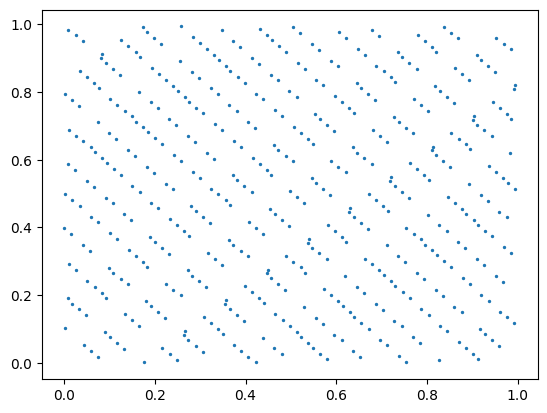

(array([  3.,   9.,  25.,  57.,  90., 112., 100.,  62.,  30.,  12.]),
 array([-3.1741752 , -2.60560506, -2.03703492, -1.46846479, -0.89989465,
        -0.33132451,  0.23724563,  0.80581577,  1.37438591,  1.94295604,
         2.51152618]),
 <BarContainer object of 10 artists>)

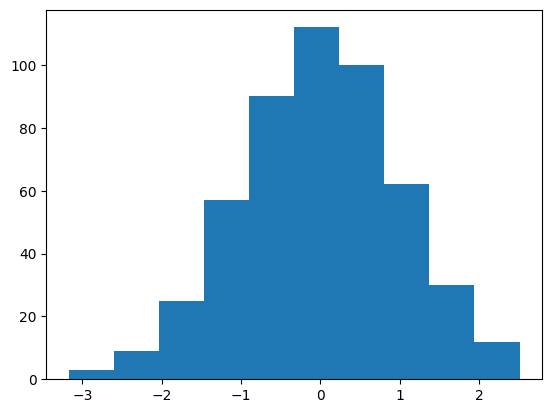

In [20]:
dim = 10
count = 500
faure_sequence = ot.FaureSequence(dim)
faure_data = faure_sequence.generate(count)
plt.scatter(np.array(faure_data[:, 0]).reshape(1, count)[0], np.array(faure_data[:, 2]).reshape(1, count)[0], 2)
plt.show()
plt.hist(norm.ppf(np.array(faure_data[:, 3]).reshape(1, count)[0]), bins=10)

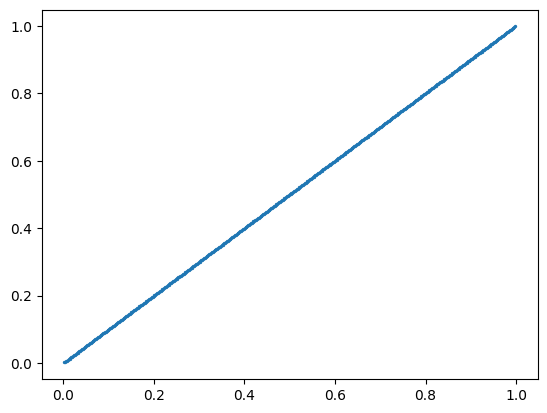

(array([  5.,  16.,  42.,  82., 111., 112.,  81.,  42.,  16.,   5.]),
 array([-2.88563491, -2.30850793, -1.73138095, -1.15425396, -0.57712698,
         0.        ,  0.57712698,  1.15425396,  1.73138095,  2.30850793,
         2.88563491]),
 <BarContainer object of 10 artists>)

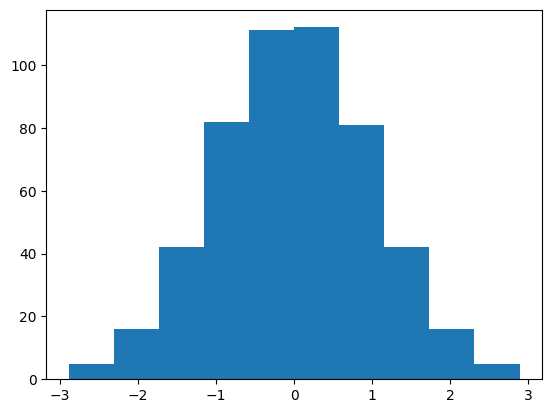

In [13]:
dim = 5
count = 512
sobol_sequence = ot.SobolSequence(dim)
sobol_data = sobol_sequence.generate(count)
plt.scatter(np.array(sobol_data[:, 4]).reshape(1, count)[0], np.array(sobol_data[:, 4]).reshape(1, count)[0], 2)
plt.show()
plt.hist(norm.ppf(np.array(sobol_data[:, 3]).reshape(1, count)[0]), bins=10)

In [22]:
def BSM_payoff(S) -> float:
    global strike
    if S > strike:
        return (float(S) - float(strike))
    return 0

In [23]:
def BSM_quasi(S, r, sigma, dt, random_values):
    return r * S * dt + sigma * S * dt * norm.ppf(random_values)

In [24]:
def BSM(S_0, r, sigma, T):
    return S_0 * np.exp((r - (sigma ** 2) / 2) * T + sigma * np.sqrt(T) * np.random.normal(0, 1))

In [25]:
def BSM_q(S_0, r, sigma, T, random_value):
    return S_0 * np.exp((r - (sigma ** 2) / 2) * T + sigma * np.sqrt(T) * norm.ppf(random_value))

In [26]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, dim
period_counts = len(faure_data)

S_faure = np.zeros((N, period_counts))
S_faure[:, 0] = S_0

for i in range(N):
    for t in range(1, period_counts):
        temp = BSM_quasi(S_faure[i, t - 1], r, sigma, T / period_counts, np.array(faure_data[:, i]).reshape(1, count)[0][t])
        S_faure[i, t] = S_faure[i, t - 1] + temp

print('europian call-option payoff:', BSM_payoff(np.mean(S_faure[:, period_counts - 1], axis=0)) * np.exp(-r * T))
print('asian call-option payoff:', BSM_payoff(np.mean(np.mean(S_faure, axis=1), axis=0)) * np.exp(-r * T))

europian call-option payoff: 1.901512836882862
asian call-option payoff: 0.9345901042818889


In [27]:
period_counts = len(faure_data)

S = np.zeros((N, period_counts))
S[:, 0] = S_0

for i in range(N):
    for t in range(1, period_counts):
        temp = BSM_quasi(S[i, t - 1], r, sigma, T / period_counts, np.array(sobol_data[:, i]).reshape(1, count)[0][t])
        S[i, t] = S[i, t - 1] + temp

print('europian call-option payoff:', BSM_payoff(np.mean(S[:, period_counts - 1], axis=0)) * np.exp(-r * T))
print('asian call-option payoff:', BSM_payoff(np.mean(np.mean(S, axis=1), axis=0)) * np.exp(-r * T))

europian call-option payoff: 1.9030100501984233
asian call-option payoff: 0.935693984161469


In [28]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, count

bsm = np.mean(np.vectorize(BSM_payoff)([BSM(S_0, r, sigma, T) for i in range(N)]) * np.exp(-r * T))
bsm_sobol = np.mean(np.vectorize(BSM_payoff)([BSM_q(S_0, r, sigma, T, np.array(sobol_data[:, 1]).reshape(1, count)[0][i]) for i in range(N)]) * np.exp(-r * T))
bsm_faure = np.mean(np.vectorize(BSM_payoff)([BSM_q(S_0, r, sigma, T, np.array(faure_data[:, 2]).reshape(1, count)[0][i]) for i in range(N)]) * np.exp(-r * T))


print('payoff:')
print('bsm analytical:', bsm)
print('bsm sobol:', bsm_sobol)
print('bsm faure:', bsm_faure)
print('exact solution:', BS_exact(S_0, sigma, T, r, strike))

payoff:
bsm analytical: 2.0470416621580685
bsm sobol: 2.0604898263809477
bsm faure: 1.6949414514649594
exact solution: 2.0616301851268855


In [37]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, count
S_bsm = np.zeros(dim)
S_bsm_sobol = np.zeros(dim)
S_bsm_faure = np.zeros(dim)

for j in range(dim):
    bsm = np.mean(np.vectorize(BSM_payoff)([BSM(S_0, r, sigma, T) for i in range(N)]) * np.exp(-r * T))
    bsm_sobol = np.mean(np.vectorize(BSM_payoff)([BSM_q(S_0, r, sigma, T, np.array(sobol_data[:, j]).reshape(1, count)[0][i]) for i in range(N)]) * np.exp(-r * T))
    bsm_faure = np.mean(np.vectorize(BSM_payoff)([BSM_q(S_0, r, sigma, T, np.array(faure_data[:, j]).reshape(1, count)[0][i]) for i in range(N)]) * np.exp(-r * T))
    S_bsm[j] = bsm
    S_bsm_sobol[j] = bsm_sobol
    S_bsm_faure[j] = bsm_faure

print('payoff:')
print('bsm analytical:', bsm)
print('bsm sobol:', bsm_sobol)
print('bsm faure:', bsm_faure)
print('exact solution:', BS_exact(S_0, sigma, T, r, strike))

payoff:
bsm analytical: 2.0570829383169476
bsm sobol: 2.0610780948070904
bsm faure: 1.693493711596102
exact solution: 2.0616301851268855


In [39]:
S_bsm_faure

array([1.69195549, 1.69394613, 1.69494145, 1.69385565, 1.69503194,
       1.69530339, 1.6952129 , 1.69376516, 1.69494145, 1.69349371])